break after 16 iterations


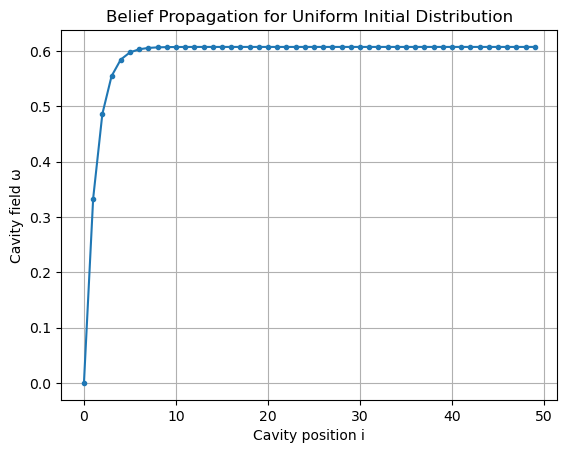

In [8]:
import numpy as np
import matplotlib.pyplot as plt

######ex.1.2

#defining functions
def step_cavity(omega_prev, beta, h):
    return h + (1 / beta) * np.arctanh(np.tanh(beta) * np.tanh(beta * omega_prev))

def belief_propagation(N, beta, h, x0, bound):
    omega = np.full(N, x0)
    omega_temp = omega.copy()
    
    for iteration in range(1000): #choose iterations here
        for i in range(1, N):
            omega_temp[i] = step_cavity(omega[i-1], beta, h)
        
        if np.max(np.abs(omega_temp - omega)) < bound:
            print(f"break after {iteration} iterations")
            break
        omega[:] = omega_temp
    
    return omega

# defining Parameters
beta_val = 0.5
h_val = 1/3
N_size = 50
x0_val=0.0
bound_val=1e-6

# Run with uniform distribution
results_omega = belief_propagation(N_size, beta_val, h_val, x0_val, bound_val)

# Plot result
plt.plot(range(N_size), results_omega, marker='.')
plt.xlabel("Cavity position i")
plt.ylabel("Cavity field ω")
plt.title("Belief Propagation for Uniform Initial Distribution")
plt.grid(True)
plt.show()

break after 15 iterations


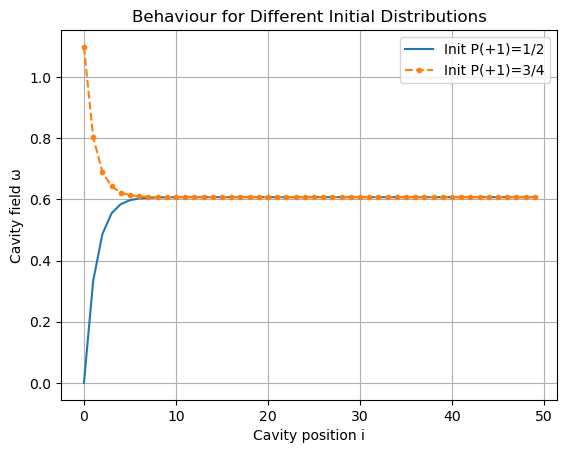

In [9]:
##ex1.3

#uneven distribution
omega0 = (1 / (2 * beta_val)) * np.log(0.75 / 0.25)
results_omega_2 = belief_propagation(N_size, beta_val, h_val, omega0,bound_val)

plt.plot(range(N_size), results_omega, label="Init P(+1)=1/2")
plt.plot(range(N_size), results_omega_2, linestyle='--', marker='.', label="Init P(+1)=3/4")
plt.xlabel("Cavity position i")
plt.ylabel("Cavity field ω")
plt.legend()
plt.title("Behaviour for Different Initial Distributions")
plt.grid(True)
plt.show()

In [7]:
##ex1.4

#find point via fixedpoint method
def find_fixed_point(beta, h, x0=0.0, bound=1e-10): ##set precision here
    omega = x0
    for _ in range(1000):
        omega_temp = step_cavity(omega, beta, h)
        if abs(omega_temp - omega) < bound:
            break
        omega = omega_temp
    return omega

def magnetization(omega_star, beta):
    return np.tanh(beta * omega_star)

#set up values
beta_values = np.linspace(0.1, 3.0, 50)
h = 1.0

print(" β       ω*           ⟨σ⟩")
for beta in beta_values:
    omega_star = find_fixed_point(beta, h)
    m = magnetization(omega_star, beta)
    print(f"{beta:4.2f}   {omega_star: .6f}   {m: .6f}")

 β       ω*           ⟨σ⟩
0.10    1.110204    0.110566
0.16    1.184907    0.186412
0.22    1.265639    0.269546
0.28    1.350354    0.358176
0.34    1.435932    0.449065
0.40    1.518671    0.537953
0.46    1.595157    0.620587
0.51    1.663056    0.693821
0.57    1.721409    0.756155
0.63    1.770403    0.807587
0.69    1.810922    0.849084
0.75    1.844142    0.882063
0.81    1.871266    0.908017
0.87    1.893391    0.928319
0.93    1.911454    0.944146
0.99    1.926234    0.956464
1.05    1.938362    0.966043
1.11    1.948346    0.973495
1.17    1.956592    0.979294
1.22    1.963425    0.983810
1.28    1.969107    0.987331
1.34    1.973846    0.990078
1.40    1.977810    0.992224
1.46    1.981136    0.993901
1.52    1.983933    0.995214
1.58    1.986292    0.996242
1.64    1.988286    0.997047
1.70    1.989975    0.997679
1.76    1.991408    0.998175
1.82    1.992627    0.998564
1.88    1.993666    0.998870
1.93    1.994551    0.999111
1.99    1.995308    0.999300
2.05    1.995956 